In [ ]:
using Plots
using LaTeXStrings

# Creating a Phase Diagram in Julia

In [59]:
# We devise a PVPython script that tells us the size of a pore.
# The data we receive is in a text document of the number type float.

path = "C:\\Users\\gabey\\OneDrive\\Desktop\\Fall 2023\\SM Research\\Phase Diagram VTK Exports and PP\\Single Pore Round 3\\"
name1 = "PoreSizeData.txt"
delimiter = ","
pop = "\n"
file = open(path*name1, "r")
strdata = readlines(file)


gs = []
qs = []

for line in strdata[begin+1:1:end]
    line = replace(line, pop => "")
    line = split(line, delimiter)
    g = parse(Float64, line[1])
    push!(gs,g)
    q = parse(Float64, line[2])
    push!(qs,q)
end

gs = union(gs)*0.1
qs = union(qs)*0.1
sizes = rand(length(gs), length(qs))


for i in 1:length(qs)
    for j in 1:(length(gs))
        line = strdata[i+(j-1)*length(qs)+1]
        line = replace(line, pop => "")
        line = split(line, delimiter)
        sizes[j, i] = parse(Float64, line[3])
    end
end


In [60]:
# We now run the script for the negative values of q

path = "C:\\Users\\gabey\\OneDrive\\Desktop\\Fall 2023\\SM Research\\Phase Diagram VTK Exports and PP\\Single Pore Round 3\\"
name2 = "PoreSizeDatan.txt"
delimiter = ","
pop = "\n"
file2 = open(path*name2, "r")
strdata2 = readlines(file2)


gs = []
qns = []

for line in strdata2[begin+1:1:end]
    line = replace(line, pop => "")
    line = split(line, delimiter)
    g = parse(Float64, line[1])
    push!(gs,g)
    q = parse(Float64, line[2])
    push!(qns,q)
end

gs = union(gs)*0.1
qns = -reverse(union(qns)*0.1)
sizesn = rand(length(gs), length(qns))

print(qns)

for i in 1:length(qns)
    for j in 1:(length(gs))
        line = strdata2[length(qns) - (i-1) + (j-1)*length(qns)+1]
        line = replace(line, pop => "")
        line = split(line, delimiter)
        sizesn[j, i] = parse(Float64, line[3])
    end
end
print(size(sizesn))

[-0.5, -0.4, -0.30000000000000004, -0.2, -0.1](20, 5)

In [65]:
allqs = cat(qns, qs, dims = 1)
allsizes = cat(sizesn', sizes', dims = 1)'
print(size(allqs))
print(size(allsizes))

(31,)

(20, 31)

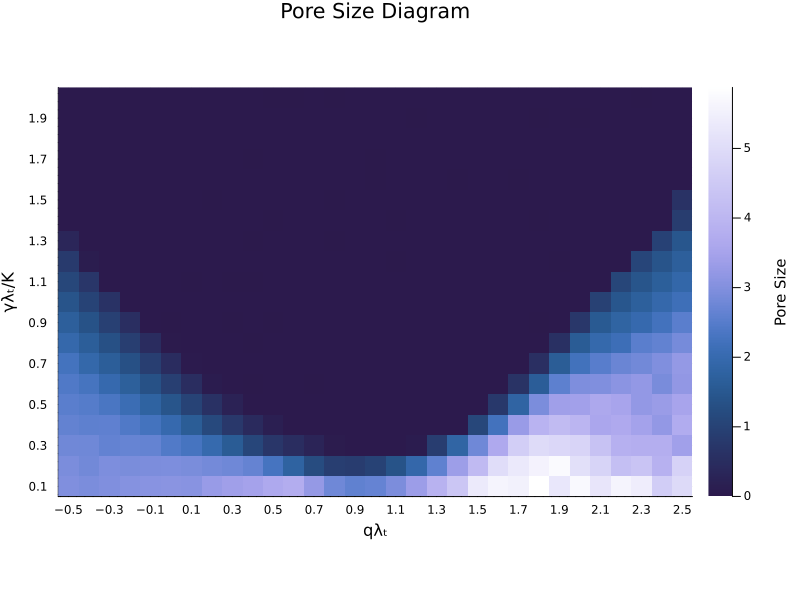

In [68]:
heatmap(allqs, gs, allsizes ,aspect_ratio = 1, color = cgrad(:devon, rev=false), size=(800,600), title = "Pore Size Diagram",minorgrid=true,  xlabel="qλₜ", ylabel="γλₜ/K", xlims = [allqs[begin]-0.05, allqs[end]+0.05], ylims = [gs[begin]-0.05, gs[end]+0.05], xticks = allqs[begin:2:end], yticks=gs[begin:2:end], colorbar_title=join(["Pore Size"]))



In [69]:
savefig(path*"PSD.png")

"C:\\Users\\gabey\\OneDrive\\Desktop\\Fall 2023\\SM Research\\Phase Diagram VTK Exports and PP\\Single Pore Round 3\\PSD.png"